In [1]:
%matplotlib inline

import pandas as pd

In [1]:
(4*10)+(10*21)+(12*21)

502

# Cargar

### Datos sobre Foursquare checkins en NYC, descargados desde [la página de Dingqi Yang](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [31]:
data = pd.read_csv('checkins.csv')

In [32]:
data.head()

,user,venue
0,35443,899
1,24973,42406
2,14860,177
3,222505,177
4,63524,609


In [33]:
#Usuarios unicos
print(len(data['user']))
print(len(data['user'].unique()))

27149
2060


In [34]:
data['checkin'] = 1

In [35]:
#Validar si existen personas que consumen mas frecuencia el mismo lugar
data.groupby(['user','venue']).count().sort_values('checkin',ascending=False)

,,checkin
user,venue,
51957,43558,149
51445,64971,92
17238,9209,86
8952,39242,74
133970,411,73
39836,15743,72
38456,7999,69
59959,5222,63
49029,13912,55


In [36]:
#probando set para obtener valores unicos
my_list = [1, 1, 1, 2, 3]

In [37]:
set(my_list)

{1, 2, 3}

In [38]:
#borraremos los duplicados
data = data.drop_duplicates()

In [39]:
data.shape

(13462, 3)

# Transformar

In [40]:
data.head()

,user,venue,checkin
0,35443,899,1
1,24973,42406,1
2,14860,177,1
3,222505,177,1
4,63524,609,1


In [42]:
len(set(data['user']))

2060

In [43]:
len(set(data['venue']))

3411

In [45]:
#metodo de pivote
checkins_matrix = data.reset_index()\
    .pivot(index='venue', columns='user', values='checkin')\
    .fillna(0)\
    .astype(int)

In [46]:
#matriz de x * y
checkins_matrix.head()

user,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
checkins_matrix.shape

(3411, 2060)

In [48]:
checkins_matrix.sum(axis=1)

venue
2          30
3           2
4           4
5           2
7          35
13          3
14          1
15          3
18         13
19          2
21          7
24          3
25         29
26          2
28          1
29          1
34          2
36         27
37          5
39         13
41          5
42          8
46         16
47         17
48          9
52          2
59          6
63         12
64         13
67          4
           ..
145078      2
147002      3
148402      1
148562      1
161178      1
168672      1
169196      1
174218      1
176075      3
181971      1
184152      1
186707      1
189445      1
192063      1
194112      2
194512      1
194804      1
199537      1
219333      1
230202      1
242095      1
264922      1
407167      1
502393      2
726679      2
808115      1
811401      1
885559      3
1654176     1
1782104     1
Length: 3411, dtype: int64

# Visualizar

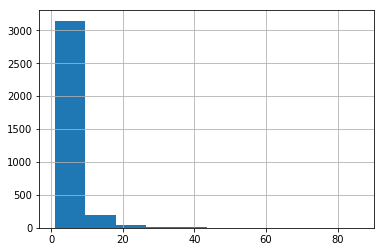

In [51]:
#si pones log=True podras observar la diferencia entre el anterior
checkins_matrix.sum(1).hist()

# Computar similaridades

In [52]:
#ejemplo distancia o similaridad(1-distancia) de jaccard
venue_1 = {1, 2, 4}

In [53]:
venue_2 = {3, 2, 4}

In [54]:
intersection = venue_1.intersection(venue_2)

In [55]:
len(intersection)

2

In [56]:
union = venue_1.union(venue_2)

In [57]:
len(union)

4

In [58]:
len(intersection) / len(union)

0.5

In [59]:
def jaccard_similarity(venue_1, venue_2):
    venue_1_user_indices = set( venue_1[venue_1 > 0].index )
    venue_2_user_indices = set( venue_2[venue_2 > 0].index )
    intersection_length = len(venue_1_user_indices.intersection(venue_2_user_indices))
    union_length = len(venue_1_user_indices.union(venue_2_user_indices))
    
    return intersection_length / union_length

In [60]:
def compute_pairwise_jaccard_similarities(query_venue_index):
    query_venue = checkins_matrix.ix[query_venue_index]
    candidate_venues = checkins_matrix.drop(query_venue_index, axis=0)
    similarities = {}
    
    for candidate_venue_id, candidate_venue in candidate_venues.iterrows():
        similarity = jaccard_similarity(query_venue, candidate_venue)
        similarities[candidate_venue_id] = similarity
        
    return pd.Series(similarities)

# Recomendar

In [61]:
checkins_matrix.head()

user,6,15,25,72,99,102,104,105,129,131,...,264033,264057,264722,264953,265643,265904,265965,266532,266576,266712
venue,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
while True:
    try:
        query_venue_index = int( input('Please enter a query venue index: ') )
        print( compute_pairwise_jaccard_similarities(query_venue_index).sort_values(ascending=False).head(5) )
    except:
        pass

Please enter a query venue index: 26


c:\users\ranina\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


2606     0.333333
1214     0.333333
57918    0.250000
4072     0.250000
9675     0.200000
dtype: float64


In [ ]:
#como tupiensas se deberian definir tus usuarios: lugares, hora,  tiempo estadia en ugar o app.